# Machine Learning Engineer Nanodegree
## Capstone Project
Chieh-Ling Hsieh 

December 21st, 2018

## Macro economic indicators for stock market and investment strategy

## I. Definition


### Project Overview
Equity market has long been an interesting subject of study for academic, investors, market makers, but despite the amount of studies, people still never able to reach a conclusion on this subject with its ever shifting behavior. The importance of this subject has become more and more important as development and policy progress. More and more governments shifting the retirement from entitlement plan to private based investment. For example, 401K retirement plan in United States has and will be increasingly become a major income source for people entering retiring age. The importance not only has significant in overall health of the economic, but also matter to everyone's well being in the increasedly more capatalized society.

From Nobel price winner Eugene Fama's factors modeling [1], [2], to Nobel price winner Robert Shiller Cyclically adjusted price-to-earnings ratio (CAPE) and behavior economic theory [3], to Bridgewater Associate Ray Dalio Debt Cycle [4], there are various theory and factors that are some way of observing the market. While there are also theory that all the prediction are worthless as suggested Burton Malkiel in his famous book of A Random Walk Down Wall Street[5]. Retail stock investment expert Andre Kostolany has his own theory of performance = money supply + sentiment.[6]

One of the possible reason for the various conflicting theories to co-exist are the market are co-decided by all the players in the market, where the human decision might not follow strict pre-defined stragety based on tested and proved theorem. Most of the studies also suffer from lack of data during the time of studies as data collection were not as easy and analysis tools were not as pervasive. With more abundantly avaiable data today, there could be potential to perform some studies and could provide new insights into this problem.


### Problem Statement
While the global economic systems are enormously complex, there have been either more formal approaches or informal rule of thumb experience for certain big indicators that could move the market more significantly than others. Data includes economic statistics and leading indicators, long term interest rate, or even the price action of the market itself could all be used to as in hypotheis that are factors that could affect the market. By looking at the correlation relatshipings between them, we hope to identify if any of them have significant, even in coincident, leading, o lagging way.

If the signicance among these data are found to be affecting the market, a strategy can be developed to provide recommendation of investment, for as simple as whether to stay in the market when the current state suggests further increase of the market equity, or stay out of it when the current state suggest otherwise. The strategy can be benchmarked against common strategy such as the very popular passive invesment, e.g., buy and hold the index fund. Or stategy of keeping balanced asset allocation between stock and bond.

The data we obtained are from various organizations. Although all of them are time series data, they will have their own format and different time freqency of the release of the data, daily, weekly, or monthly. The duration, that is, start and end date of the data could be different as well. We will collect that data, choose the convergence of time duration where all data are available, and merge the time frequency of all into daily frequency. This will create some discreteness of the data for data with longer release frequency, but this is best matched to the real wolrd, without additional exploration or project which would introduce more variables.

We plan to use snapshot of features on a particular day, to predict the future price movement direction, going up or going down. But stating problem this way, it is a classification problem that we use the values of a set of features, to predict whether it is a bull or bear signal - a boolean value. This type of problem can be dealt with using supervised learning algorithms such as SVM, Naive Bayes, and Decision Tree.


### Metrics

There are several scores available for evalulation of supervised learning algorithms, such as:
* accuracy score: TP+TN/TP+FP+FN+TN
* precision score: TP/TP+FP
* recall score: TP/TP+FN
* f1 score: 2*(Recall * Precision) / (Recall + Precision)

Where True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN) [7]
  
It has been proved that in investment, people would rather high likelihood of not losing money rather that low likeihood of earning a lot more money. In our research, we plan to classifiy the features either as bull or bear market indicator and label bull market as 1. If users use the model to do both long short trading stragegy, they will need both bull and bear signal to be correct, hence accuracy score is important. In the assumption that people are not shorting the market, they will be more happy on high accurarcy of bull market call, as this is make them not losing money. In such case, precision score is more important. We will use accurarcy score as major benchmark and precision score as auxiliary benchmark.


## II. Analysis


### Data Exploration

The data we explored are maintenaced, published and made available by different organizations and in different formats. One unique characteristics of all the data is they are all time-series data. However, they might have different period of time that they collected the data, and have different frequency of data they are able to gather and collect.

For example, trading related data are available daily. While sentiment data based on survey are available weekly. Macro economic indicators and margin debt statistics are available only monthly. Some wrangling are necessary to be able to bring all the data to common format and background for processing.



Financial market data and some of the macro economic data, are gathered from

* Yahoo Finance

Economic indicator data, are gathered from

* Conference Board

Treasury interest rate data, are gathered from

* Federal Reserve Bank of St. Louis

Market sentiment data, are gathered from

* Chicago Board Options Exchange
* American Association of Individual Investors
* National Association of Active Investment Managers

Data on the use of margin trading, are gathered from

* Financial Industry Regulatory Authority, Inc.

> The data collections process were done programmatically but are disucssed in detail as the process are out of scope of this research.


#### Stock Price Data


In [1]:
from common.stockhistory import Get_Yahoo_CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import datetime
%matplotlib inline

DATE_START = '2006-01-01'
DATE_END = '2019-01-01'
INVESTMENT_BENCHMARK = "^GSPC"
data = Get_Yahoo_CSV(INVESTMENT_BENCHMARK, start = DATE_START, end = DATE_END)[['Close']]
data.describe()

,Close
count,3261.000000
mean,1663.984090
std,532.328386
min,676.530029
25%,1277.930054
50%,1470.729980
75%,2067.889893
max,2930.750000


In [2]:
data.tail(5)

,Close
Date,
2018-12-10,2637.719971
2018-12-11,2636.780029
2018-12-12,2651.070068
2018-12-13,2650.540039
2018-12-14,2599.949951


#### 10 year US Treasury Interest Rate

In [3]:
data_tnx = Get_Yahoo_CSV("^TNX", start = DATE_START, end = DATE_END)[['Close']]
data_tnx.describe()

,Close
count,3261
unique,1976
top,2.491000
freq,7


In [4]:
data_tnx.tail(5)

,Close
Date,
2018-12-10,2.856000
2018-12-11,2.879000
2018-12-12,2.906000
2018-12-13,2.911000
2018-12-14,2.891000


#### 3-Month Treasury Bill: Secondary Market Rate

In [5]:
data_tb3ms = Get_Yahoo_CSV("TB3MS", start = DATE_START, end = DATE_END)[['TB3MS']]
data_tb3ms.describe()

,TB3MS
count,155.000000
mean,1.084129
std,1.615960
min,0.010000
25%,0.055000
50%,0.160000
75%,1.600000
max,5.030000


In [6]:
data_tb3ms.tail(5)

,TB3MS
Date,
2018-07-01,1.96
2018-08-01,2.03
2018-09-01,2.13
2018-10-01,2.25
2018-11-01,2.33


#### Conference Board Leading Economic Indicator

In [7]:
import json
PERIODSIZE_SHORT = 6
PERIODSIZE_LONG = 12
with open('data/leius.json','rt') as fjsonin:
    LEIUS = json.load(fjsonin)

LEI_DATA = []
for item in LEIUS:
    LEI_DATA.append({
    'ReleaseDate': item['releasedate'],
    'DeltaPrevMonth': float(item['monthlydelta'])
    })

data_lei = pd.DataFrame(LEI_DATA)
data_lei = data_lei.sort_values('ReleaseDate')
# sort before calcualting moving average
data_lei['DeltaPrevMonthSMAShort'] = data_lei['DeltaPrevMonth'].rolling(PERIODSIZE_SHORT).mean()
data_lei['DeltaPrevMonthSMALong'] = data_lei['DeltaPrevMonth'].rolling(PERIODSIZE_LONG).mean()
data_lei.describe()

,DeltaPrevMonth,DeltaPrevMonthSMAShort,DeltaPrevMonthSMALong
count,196.000000,191.000000,185.000000
mean,0.236224,0.238743,0.238559
std,0.448318,0.280824,0.241814
min,-1.000000,-0.566667,-0.358333
25%,-0.100000,0.050000,0.083333
50%,0.300000,0.266667,0.266667
75%,0.500000,0.450000,0.433333
max,1.400000,0.866667,0.775000


In [8]:
data_lei.tail(5)

,DeltaPrevMonth,ReleaseDate,DeltaPrevMonthSMAShort,DeltaPrevMonthSMALong
4,0.1,2018-06-21,0.516667,0.516667
3,0.5,2018-07-19,0.483333,0.508333
2,0.7,2018-08-17,0.466667,0.541667
1,0.4,2018-09-20,0.416667,0.541667
0,0.5,2018-10-18,0.433333,0.575000


#### CPOE Put/Call Ratio

In [9]:
data_pcratio = pd.read_csv('data/pcratio_data/totalpc_my.csv',
    #converters = {0:"Date", 1:"Calls", 2: "Puts", 3:"Total", 4:"Ratio"},
    #names = ["Date", "Calls", "Puts", "Total", "Ratio"],
    usecols = [0,3,4], skiprows=2,
    parse_dates=True, keep_date_col=True, index_col=0 )

data_pcratio.describe()

,TOTAL,P/C Ratio
count,3.816000e+03,3816.000000
mean,3.870285e+06,0.934717
std,1.489489e+06,0.159862
min,3.812490e+05,0.320000
25%,3.042686e+06,0.830000
50%,3.902092e+06,0.920000
75%,4.704442e+06,1.020000
max,1.145447e+07,1.690000


In [10]:
data_pcratio.tail(5)

,TOTAL,P/C Ratio
DATE,,
2018-12-10,6229012,1.07
2018-12-11,4384177,0.97
2018-12-12,4669083,1.00
2018-12-13,3891704,1.16
2018-12-14,5421428,1.14


#### American Association of Individual Investors Sentiments

In [11]:
data_aaii = pd.read_excel('data/sentiment_data/sentiment.xls',
    skiprows=[0,1,2], usecols=[0,1,2,3] )

_l = []
for _i in data_aaii.index:
    # for pandas version 0.18.1, the type of date read was pd.tslib.Timestamp
    # for pandas version 0.22.0, the type of date read become dateime.datetime
    if type( data_aaii.loc[_i, 'Date']) != datetime.datetime:
        _l.append(_i)
data_aaii.drop(_l, inplace=True)
data_aaii['BullMinusBear'] = data_aaii['Bullish'] - data_aaii['Bearish']
data_aaii.set_index('Date', inplace=True)
data_aaii.describe()

,Bullish,Neutral,Bearish,BullMinusBear
count,1637.000000,1637.000000,1637.000000,1637.000000
mean,0.382409,0.314427,0.303164,0.079245
std,0.101648,0.085503,0.095121,0.177340
min,0.120000,0.076900,0.060000,-0.540000
25%,0.309100,0.250000,0.235300,-0.040000
50%,0.380000,0.313808,0.291545,0.080000
75%,0.447100,0.370690,0.359155,0.200000
max,0.750000,0.620000,0.702700,0.628600


In [12]:
data_aaii.tail(5)

,Bullish,Neutral,Bearish,BullMinusBear
Date,,,,
2018-11-15,0.350877,0.289474,0.359649,-0.008772
2018-11-22,0.252525,0.276094,0.471380,-0.218855
2018-11-29,0.338816,0.266447,0.394737,-0.055921
2018-12-06,0.379433,0.315603,0.304965,0.074468
2018-12-13,0.209040,0.302260,0.488701,-0.279661


#### National Association of Active Investment Managers Sentiment

In [13]:
data_naaim = pd.read_csv("data/sentiment_data/naaim_chart_data.csv",
    parse_dates=True, keep_date_col=True, index_col=0 )
    #skiprows=[0,1,2], usecols=[0,1,2,3] )

# reverse the df
data_naaim = data_naaim[::-1]

data_naaim.describe()

,Mean/Average,Most Bearish Response,Quart 1 (25% at/below),Quart 2 (median),Quart 3 (25% at/above),Most Bullish Response,Standard Deviation,NAAIM Number,S&P 500
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,63.374992,-87.064319,42.608928,68.155727,87.108606,175.687596,50.875972,63.374870,1385.776738
std,24.394180,71.409938,27.959401,27.615449,20.620927,34.023004,12.016261,24.394058,904.451501
min,-3.560000,-200.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,-3.560000,0.000000
25%,46.550000,-125.000000,20.000000,50.000000,80.000000,150.000000,42.560000,46.550000,840.240000
50%,68.130000,-100.000000,50.000000,77.000000,100.000000,200.000000,51.060000,68.130000,1503.350000
75%,82.630000,-5.000000,65.000000,90.000000,100.000000,200.000000,59.000000,82.630000,2079.610000
max,120.560000,85.000000,95.000000,100.000000,130.000000,210.000000,82.930000,120.560000,2925.510000


In [14]:
data_naaim.tail(5)

,Mean/Average,Most Bearish Response,Quart 1 (25% at/below),Quart 2 (median),Quart 3 (25% at/above),Most Bullish Response,Standard Deviation,NAAIM Number,S&P 500
Date,,,,,,,,,
2018-11-14,35.13,-100,7.00,45.0,60.00,107,48.37,35.13,2722.18
2018-11-21,30.55,-200,2.50,30.0,79.00,130,73.89,30.55,2641.89
2018-11-28,53.21,0,19.25,50.0,92.81,120,39.99,53.21,2743.79
2018-12-05,61.96,-100,27.50,75.0,100.00,200,61.26,61.96,2700.06
2018-12-12,55.51,0,2.50,49.5,94.44,200,50.14,55.51,2651.07


#### FINRA Margin Debt

In [15]:
data_finra = pd.read_csv("data/margindebt-data-finra.csv",
    parse_dates=True, keep_date_col=True, index_col=0 )

data_finra.describe()

,MarginDebt,PctChangesPrevMonth,MarketCap,MarginOfMarketCap
count,263.000000,262.000000,1.550000e+02,155.000000
mean,313411.494297,0.007790,2.144062e+13,0.018797
std,151283.881728,0.044454,6.103610e+12,0.001533
min,102842.000000,-0.197189,9.432491e+12,0.014043
25%,188636.500000,-0.014875,1.729033e+13,0.018345
50%,267710.000000,0.011140,2.007907e+13,0.019183
75%,410389.000000,0.031008,2.619033e+13,0.019697
max,668940.000000,0.123778,3.537032e+13,0.021848


In [16]:
data_finra.tail(5)

,MarginDebt,PctChangesPrevMonth,MarketCap,MarginOfMarketCap
Month,,,,
2018-07-01,652790.0,0.009057,3.418454e+13,0.019096
2018-08-01,652395.0,-0.000605,3.521908e+13,0.018524
2018-09-01,648126.0,-0.006544,3.537032e+13,0.018324
2018-10-01,607645.0,-0.062459,3.291550e+13,0.018461
2018-11-01,607645.0,0.000000,3.350335e+13,0.018137


### Exploratory Visualization
Given all are time series data indexed by the date, we plot simple time series for those data.


,Close
Date,
2018-12-12,2651.070068
2018-12-13,2650.540039
2018-12-14,2599.949951


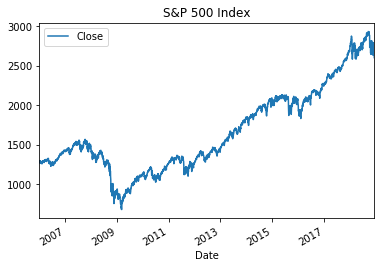

In [17]:
%matplotlib inline
data.plot(kind='line', title="S&P 500 Index")
data.tail(3)

The price data, S&P 500 Index has daily frequency value beween 1000 to 3000. 

,Close
Date,
2018-12-12,2.906
2018-12-13,2.911
2018-12-14,2.891


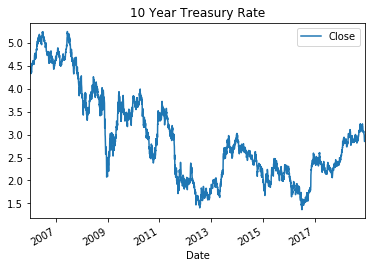

In [18]:
data_tnx = data_tnx.query("Close!='null'")
data_tnx["Close"] = data_tnx["Close"].astype(float)
data_tnx.plot(kind='line', title="10 Year Treasury Rate")
data_tnx.tail(3)

The 10 Year Treasury Interest Rate has daily frequency and rate between 0% to 6%.

,TB3MS
Date,
2018-09-01,2.13
2018-10-01,2.25
2018-11-01,2.33


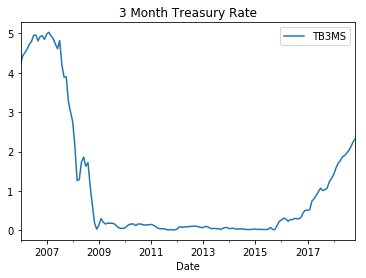

In [19]:
data_tb3ms.plot(kind='line', title="3 Month Treasury Rate")
data_tb3ms.tail(3)

3 Month Treasury Interest Rate has monthly frequency and range between 0% to 6%.

,DeltaPrevMonth,ReleaseDate,DeltaPrevMonthSMAShort,DeltaPrevMonthSMALong
2,0.7,2018-08-17,0.466667,0.541667
1,0.4,2018-09-20,0.416667,0.541667
0,0.5,2018-10-18,0.433333,0.575000


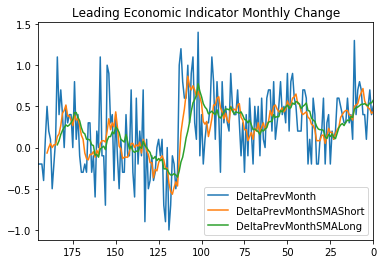

In [20]:
data_lei.plot(kind='line', title="Leading Economic Indicator Monthly Change")
data_lei.tail(3)

Leading Economic Indicator's Monthly Percentage Change has monthly frequency and value between -1.0% to 1.5%. The data appear not well aligned on date, as other data set. As the "Date" is not used as index. When we bring all data set together this will be addressed.

,TOTAL,P/C Ratio
DATE,,
2018-12-12,4669083,1.00
2018-12-13,3891704,1.16
2018-12-14,5421428,1.14


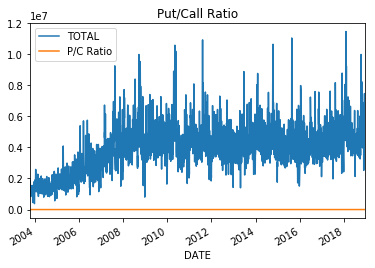

In [21]:
data_pcratio.plot(kind='line', title="Put/Call Ratio")
data_pcratio.tail(3)

Put/Call Ratio has daily frequency and value between 0 to 1.2

,Bullish,Neutral,Bearish,BullMinusBear
Date,,,,
2018-11-29,0.338816,0.266447,0.394737,-0.055921
2018-12-06,0.379433,0.315603,0.304965,0.074468
2018-12-13,0.209040,0.302260,0.488701,-0.279661


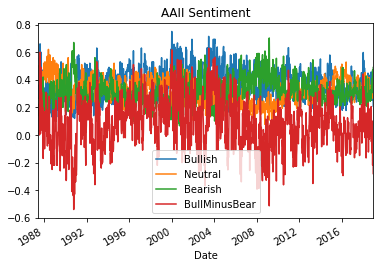

In [22]:
data_aaii.plot(kind='line', title="AAII Sentiment")
data_aaii.tail(3)

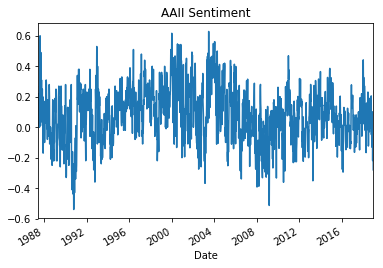

In [23]:
data_aaii.BullMinusBear.plot(kind='line', title="AAII Sentiment")

AAII Sentiment is survey data of investors. It has a weekly frequency. There are data for bullish, bearish, and neutral sentiment. To get a common value, we choose to use bullish percentage minus bearish percentage as the reference value for the overall sentiment.

,Mean/Average,Most Bearish Response,Quart 1 (25% at/below),Quart 2 (median),Quart 3 (25% at/above),Most Bullish Response,Standard Deviation,NAAIM Number,S&P 500
Date,,,,,,,,,
2018-11-28,53.21,0,19.25,50.0,92.81,120,39.99,53.21,2743.79
2018-12-05,61.96,-100,27.50,75.0,100.00,200,61.26,61.96,2700.06
2018-12-12,55.51,0,2.50,49.5,94.44,200,50.14,55.51,2651.07


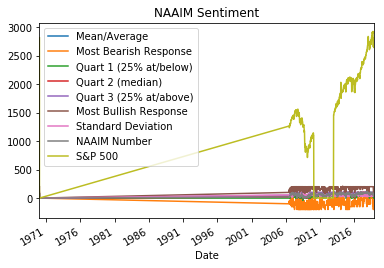

In [24]:
data_naaim.plot(kind='line', title="NAAIM Sentiment")
data_naaim.tail(3)

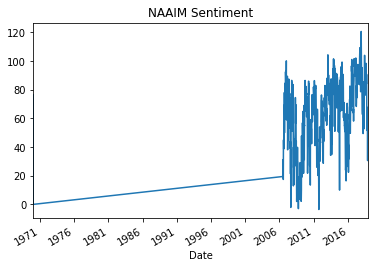

In [25]:
data_naaim["Mean/Average"].plot(kind='line', title="NAAIM Sentiment")

NAAIM Sentiment is survey data of investors. It has a weekly frequency. To get a common value, we choose to use mean as the reference value for the overall sentiment.

,MarginDebt,PctChangesPrevMonth,MarketCap,MarginOfMarketCap
Month,,,,
2018-09-01,648126.0,-0.006544,3.537032e+13,0.018324
2018-10-01,607645.0,-0.062459,3.291550e+13,0.018461
2018-11-01,607645.0,0.000000,3.350335e+13,0.018137


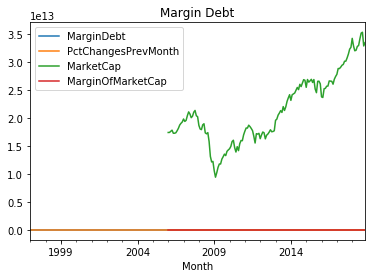

In [26]:
data_finra.plot(kind='line', title="Margin Debt")
data_finra.tail(3)

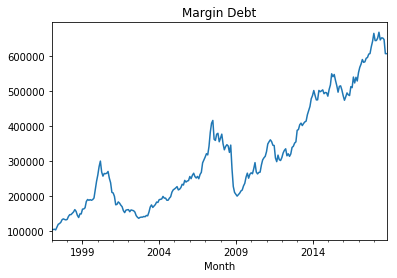

In [27]:
data_finra.MarginDebt.plot(kind='line', title="Margin Debt")

Margin debt has monthly frequency.



### Algorithms and Techniques

The data we gather can be grouped into following categories:

* Macro Economic Data
  * Leading Economic Indicator: various of collected econimic data and appear to be able to predict the GDP in the near future.
  * US Treasury rate, including 10 year and 3 month duration.
* Investors Sentiment
  * From survey of investors organizations, American Association of Individual Investors, and National Association of Active Investment Managers
  * Put/Call Ratio, which are actual stock option traded that can be used as a measure of how many are betting on being a bull or a bear market.
* Equity price
  * The price of equity itself can be a reflection of how well economic is doing and how optimistic the investors are.

As the data are not of the same frequency, we will have to adjust the data so that they are of the same scale. We decided to put all data on the same daily frequency, and for weekly and monthly data, extend their value to the next release cycle. This will make the adjusted data appeared discrete instead of continuous. Although awkwark, but more closely matched to real world experience.

Then we use all data at a particular snapshot as feataures, and use the price change of the equity from this day to 30 days after as label. If the price increased, it's consider a bull signal and labeled as 1. Otherwise it's considered bear signal and labeled as 0. For the case of no price change, we will treat it as bull signal. This should avoid the amount of trading.

This arrangement allows as to use supervised learning algorithm to classify the current snapshot as bull or bear signal for 30 days after. For the algorithms to choose from, we plan to use the following:

Support Vector Machines (SVM):
* SVM is good at text categorization, classification of images, hand-written recognization, and appled widely in biological science.
* SVM is effective in high dimensional spaces.
* SVM performed well in multi-dimensional dataset, which is the case here.
* SVM build a hyperplane to seperate the datapoints into two classifications as bull and bear signal in our case. Our data set is muti-dimensional which is not as easy to visualize. For two dimensional features, SVMs work like the image below, use a line to separate datapoints. Image reference: [wiki](https://en.wikipedia.org/wiki/Support_vector_machine)
<img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Svr_epsilons_demo.svg">

Decision Tree:
* The model is easy to understand and interpret, as it uses a white box model and can see how the decisions are made.
* The decision process can be easily visualized like a flow chart.
* When the numbers of featrues is large, decision tree could create a model that is complex and not easy to understand.
* Decision Tree gives us analysis of important features and their weights.
* A flowchart that explains Decision Tree's decision process is as below. Image reference: [wiki](https://en.wikipedia.org/wiki/Decision_tree)
<img src="https://upload.wikimedia.org/wikipedia/commons/8/87/Beachdecisiontree.png">

Naive Bayes:
* Naive Bayes is used when the features are considered to have strong independence.
* Naive Bayes is quite to calculate and do multi-dimensionaly dataset well.
* If the assumption of Naive Bayes - strong independence between features, does not hold, the result could be less accurate.
* In this example, some features  could affect each other. For example, low interest rate implies lower capital cost and could implies normally higher economic growth and the value of economic indicators. However, some features appear to be less directly relate to each other. For example, investor sentiments could swing to either direction dramatically and quickly, while the fundamental like economic and interest rate stay relatively the same.


For the spliting of training and test data, it makes logical sense to use past to predict future. The reverse won't be plausible anyway because future is unknown. We collected the data since year 2006, and will use duration between 2006 to 2016 as training data, and in year 2017 and 2018 as testing data.




### Benchmark
Our tradining suggestion will assumed to be for when to buy and sell ordinary equity such as index fund, not involve any shorting strategy. As a result, the target audiance should care more about whether a predicted bull signal is actually a bull. An unpredicted bull signal, a loss opportunity, should not create too much remorse of customer. While a incorrect predicted bull signal that turn out to be bear will anger customer as it cause them to lose money. As a result, accuracy score is the better benchmark, compared to other such precision score, recall score, and F-1 score. We will use accurarcy score as the benchmark of the modeling.

To compare how the stragey performs, we can compare again the passive index, that is, to use buy and hold stragey, to always buy the stock and never sell. This is equivalent to predition that every is a bull signal disregard of any data.


## III. Methodology


### Data Preprocessing

All data are read into data frame with different frequency. We plan to copy them back to the main data frame, which is the equity price data frame. We will rename the column to make them more readable when grouped together. In summary, we will perform the following cleaning:

* "data" Price data data frame: change column name from "Close" to "Price". In addition, we create new columns "PricePctP30" and "PricePctN30" to represent the percentage of price change of past 30 days change and next 30 days. We also create a label of "BULL" that based on price change of the next 30 days, to indicate the present day should be considered a bull signal or not.
* "data_tnx" 10 Year Treasury Internet Rate: copy and change column name from "Close" to "TNX"
* "data_tb3ms" 10 Year Treasury Internet Rate: copy and keep the column name of "TB3MS". The monthly data are carried forward daily until the next month's release.
* "data_lei" Leading Economic Indicator: change "ReleaseDate" to "Date" and set as index, copy and change "DeltaPrevMonthSMAShort" to "LEIMonthlyChangeSMA6". This is six month Simple Moving Average of the monthly change of the Leading Economic Indicator index. The monthly data are carried forward daily until the next month's release.
* "data_pcratio" Put/Call Ratio: copy and rename from "P/C Ratio" to "PCRatio"
* "data_aaii" American Association of Individual Investors Sentiments: copy and rename from "BullMinusBear" to "AAII". The weekly data are carried forward daily until the next week's release.
* "data_naaim" National Association of Active Investment Managers Sentiment: copy and rename from "Mean/Average" to "NAAIM". The weekly data are carried forward daily until the next week's release.
* "data_finra" Margin Debt: copy and rename from "MarginOfMarketCap" to "MarginDebtPct". The monthly data are carried forward daily until the next month's release.

When merging all the data into a single data frame, we also clip the time range of the data so all of them will have the same time duration as the "Price" data set.

In [28]:
data.rename(columns={"Close":"Price"}, inplace=True)
data.head(3)

,Price
Date,
2006-01-03,1268.800049
2006-01-04,1273.459961
2006-01-05,1273.479980


In [29]:
data["PricePctP30"] = data["Price"]
for i in range(30):
    data.iloc[i, 1] = 0.0
for i in range(30, data.shape[0]):
    data.iloc[i, 1] = (data.iloc[i, 0] - data.iloc[i-30, 0]) / data.iloc[i-30, 0]
data.head(35)    

,Price,PricePctP30
Date,,
2006-01-03,1268.800049,0.000000
2006-01-04,1273.459961,0.000000
2006-01-05,1273.479980,0.000000
2006-01-06,1285.449951,0.000000
2006-01-09,1290.150024,0.000000
2006-01-10,1289.689941,0.000000
2006-01-11,1294.180054,0.000000
2006-01-12,1286.060059,0.000000
2006-01-13,1287.609985,0.000000


In [30]:
data["PricePctN30"] = data["Price"]
for i in range(data.shape[0]-30):
    data.iloc[i, 2] = (data.iloc[i+30, 0] - data.iloc[i, 0]) / data.iloc[i, 0]
for i in range(data.shape[0]-30, data.shape[0]):
    data.iloc[i, 2] = 0.0    
data.tail(35)   

,Price,PricePctP30,PricePctN30
Date,,,
2018-10-25,2705.570068,-0.068388,-0.025078
2018-10-26,2658.689941,-0.084782,-0.008241
2018-10-29,2641.250000,-0.085693,0.003718
2018-10-30,2682.629883,-0.076328,-0.011962
2018-10-31,2711.739990,-0.067474,-0.041224
2018-11-01,2740.370117,-0.064959,0.000000
2018-11-02,2723.060059,-0.070523,0.000000
2018-11-05,2738.310059,-0.062020,0.000000
2018-11-06,2755.449951,-0.054916,0.000000


In [31]:
for i in data.index:
    if i in data_tnx.index:
        data.loc[i, "TNX"] = data_tnx.loc[i, "Close"]
data.head(3)

,Price,PricePctP30,PricePctN30,TNX
Date,,,,
2006-01-03,1268.800049,0.0,0.008827,4.370
2006-01-04,1273.459961,0.0,0.012501,4.356
2006-01-05,1273.479980,0.0,0.010805,4.356


In [32]:
data_lei.set_index("ReleaseDate", inplace=True)
for i in data_lei.index:
    data.loc[i:, "LEIMonthlyChangeSMA6"] = data_lei.loc[i, "DeltaPrevMonthSMAShort"]   

In [33]:
data.tail(3)

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6
Date,,,,,
2018-12-12,2651.070068,0.003718,0.0,2.906,0.433333
2018-12-13,2650.540039,-0.011962,0.0,2.911,0.433333
2018-12-14,2599.949951,-0.041224,0.0,2.891,0.433333


In [34]:
for i in data.index:
    if i in data_pcratio.index:
        data.loc[i, "PCRatio"] = data_pcratio.loc[i, "P/C Ratio"]
data.head(3)

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6,PCRatio
Date,,,,,,
2006-01-03,1268.800049,0.0,0.008827,4.370,0.35,0.75
2006-01-04,1273.459961,0.0,0.012501,4.356,0.35,0.75
2006-01-05,1273.479980,0.0,0.010805,4.356,0.35,0.62


In [35]:
for i in data_aaii.index:
    data.loc[i:, "AAII"] = data_aaii.loc[i, "BullMinusBear"]
data.tail(3)

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6,PCRatio,AAII
Date,,,,,,,
2018-12-12,2651.070068,0.003718,0.0,2.906,0.433333,1.00,0.074468
2018-12-13,2650.540039,-0.011962,0.0,2.911,0.433333,1.16,-0.279661
2018-12-14,2599.949951,-0.041224,0.0,2.891,0.433333,1.14,-0.279661


In [36]:
for i in data_naaim.index:
    if i in data.index:
        data.loc[i:, "NAAIM"] = data_naaim.loc[i, "Mean/Average"]
data.tail(3)

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6,PCRatio,AAII,NAAIM
Date,,,,,,,,
2018-12-12,2651.070068,0.003718,0.0,2.906,0.433333,1.00,0.074468,55.51
2018-12-13,2650.540039,-0.011962,0.0,2.911,0.433333,1.16,-0.279661,55.51
2018-12-14,2599.949951,-0.041224,0.0,2.891,0.433333,1.14,-0.279661,55.51


In [37]:
for i in data_finra.index:
    if i in data.index:
        data.loc[i:, "MarginDebtPct"] = data_finra.loc[i, "MarginOfMarketCap"]
data.tail(3)

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6,PCRatio,AAII,NAAIM,MarginDebtPct
Date,,,,,,,,,
2018-12-12,2651.070068,0.003718,0.0,2.906,0.433333,1.00,0.074468,55.51,0.018137
2018-12-13,2650.540039,-0.011962,0.0,2.911,0.433333,1.16,-0.279661,55.51,0.018137
2018-12-14,2599.949951,-0.041224,0.0,2.891,0.433333,1.14,-0.279661,55.51,0.018137


In [38]:
data["BULL"] = (data["PricePctN30"]>=0).astype(int)
data.tail(3)

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6,PCRatio,AAII,NAAIM,MarginDebtPct,BULL
Date,,,,,,,,,,
2018-12-12,2651.070068,0.003718,0.0,2.906,0.433333,1.00,0.074468,55.51,0.018137,1
2018-12-13,2650.540039,-0.011962,0.0,2.911,0.433333,1.16,-0.279661,55.51,0.018137,1
2018-12-14,2599.949951,-0.041224,0.0,2.891,0.433333,1.14,-0.279661,55.51,0.018137,1


In [39]:
data.head(40)

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6,PCRatio,AAII,NAAIM,MarginDebtPct,BULL
Date,,,,,,,,,,
2006-01-03,1268.800049,0.000000,0.008827,4.370,0.350000,0.75,0.0079,NaN,NaN,1
2006-01-04,1273.459961,0.000000,0.012501,4.356,0.350000,0.75,0.0079,NaN,NaN,1
2006-01-05,1273.479980,0.000000,0.010805,4.356,0.350000,0.62,-0.1087,NaN,NaN,1
2006-01-06,1285.449951,0.000000,-0.001883,4.379,0.350000,0.68,-0.1087,NaN,NaN,0
2006-01-09,1290.150024,0.000000,0.001953,4.379,0.350000,0.69,-0.1087,NaN,NaN,1
2006-01-10,1289.689941,0.000000,-0.001473,4.428,0.350000,0.71,-0.1087,NaN,NaN,0
2006-01-11,1294.180054,0.000000,-0.003670,4.458,0.350000,0.63,-0.1087,NaN,NaN,0
2006-01-12,1286.060059,0.000000,0.006267,4.410,0.350000,0.74,0.3988,NaN,NaN,1
2006-01-13,1287.609985,0.000000,-0.005398,4.350,0.350000,0.78,0.3988,NaN,NaN,0


In [40]:
data.tail(40)

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6,PCRatio,AAII,NAAIM,MarginDebtPct,BULL
Date,,,,,,,,,,
2018-10-18,2768.780029,-0.037967,-0.003110,3.175,0.433333,1.30,-0.010831,67.76,0.018461,0
2018-10-19,2767.780029,-0.036181,0.008162,3.198,0.433333,1.14,-0.010831,67.76,0.018461,1
2018-10-22,2755.879883,-0.042143,-0.020255,3.196,0.433333,1.07,-0.010831,67.76,0.018461,0
2018-10-23,2740.689941,-0.050971,-0.016324,3.166,0.433333,1.04,-0.010831,67.76,0.018461,0
2018-10-24,2656.100098,-0.080591,-0.008667,3.124,0.433333,1.29,-0.010831,51.49,0.018461,0
2018-10-25,2705.570068,-0.068388,-0.025078,3.136,0.433333,1.03,-0.130269,51.49,0.018461,0
2018-10-26,2658.689941,-0.084782,-0.008241,3.077,0.433333,1.32,-0.130269,51.49,0.018461,0
2018-10-29,2641.250000,-0.085693,0.003718,3.087,0.433333,1.27,-0.130269,51.49,0.018461,1
2018-10-30,2682.629883,-0.076328,-0.011962,3.110,0.433333,1.18,-0.130269,51.49,0.018461,0


#### Data Cleaning for avoiding look ahead bias
Given that we use the 30 days look ahead price as the data, and treat each day a snaptop, the look ahead bias is avoided, for the data of each row. Another possible look ahead bias that has to be avoided, is the training data should always be the days before test data. If we use future data to train, then look ahead bias occurs. For this, we plan to use data from 2017 and after as test data, and 2016 and before as training data. Also, we have to trim the first 30 days and last days of data as these portion of data miss information of past 30 days and next 30 days price change.

In [41]:
TRAIN_START = data.index[30]
print(TRAIN_START)

2006-02-15 00:00:00


In [42]:
TRAIN_END = "2016-12-30"

In [43]:
TEST_START = "2017-01-03"

In [44]:
TEST_END = data.index[-30]
print(TEST_END)

2018-11-01 00:00:00


#### Examination of data and final cleaning
The boundary of the of the date range of the data has been set. We can now check if there are further problem like missing value.

In [45]:
d=data[TRAIN_START:TEST_END]
d[d.isnull().any(axis=1)]

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6,PCRatio,AAII,NAAIM,MarginDebtPct,BULL
Date,,,,,,,,,,
2006-02-15,1280.000000,0.008827,0.015820,4.606,0.216667,0.71,0.056100,NaN,0.014311,1
2006-02-16,1289.380005,0.012501,0.004258,4.596,0.216667,0.70,0.044700,NaN,0.014311,1
2006-02-17,1287.239990,0.010805,0.008211,4.541,0.216667,0.83,0.044700,NaN,0.014311,1
2006-02-21,1283.030029,-0.001883,0.017848,4.563,0.300000,0.91,0.044700,NaN,0.014311,1
2006-02-22,1292.670044,0.001953,0.014613,4.531,0.300000,0.73,0.044700,NaN,0.014311,1
2006-02-23,1287.790039,-0.001473,0.016501,4.567,0.300000,0.84,0.148100,NaN,0.014311,1
2006-02-24,1289.430054,-0.003670,0.004707,4.567,0.300000,0.93,0.148100,NaN,0.014311,1
2006-02-27,1294.119995,0.006267,0.001932,4.590,0.300000,0.72,0.148100,NaN,0.014311,1
2006-02-28,1280.660034,-0.005398,0.004615,4.547,0.300000,0.91,0.148100,NaN,0.014311,1


NAAIM does missed value up to 2006-07-03. Given that we don't have the data, and fabricated data like using avergage value of it in all range does not necessary make sense. We can either drop NAAIM entirely, or avoid using those dates with missing values. Given that the missing portion about half a year, relatively small compared to the complete set of data, we decide to drop those range of dates only.

In [46]:
TRAIN_START = "2006-07-05"
d=data[TRAIN_START:TEST_END]
d[d.isnull().any(axis=1)]

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6,PCRatio,AAII,NAAIM,MarginDebtPct,BULL
Date,,,,,,,,,,
2010-10-11,1165.319946,0.094619,0.027907,NaN,0.316667,0.81,0.212900,76.42,0.018966,1
2016-11-11,2164.449951,-0.001762,0.048248,NaN,0.183333,1.07,0.095556,72.96,0.020023,1


TNX, 10 Year Treasury Rate are missing on two days. These are not holiday. Another data source that provide this data, marketwatch.com are missing on these two days as well. Internest does not have huge daily change like equity price. Given that there are only two days, it is reasonable to use mean of the day before and after as approximate.

In [47]:
data.loc["2010-10-11", "TNX"] = (data.loc["2010-10-08", "TNX"] + data.loc["2010-10-12", "TNX"]) / 2
data.loc["2016-11-11", "TNX"] = (data.loc["2016-11-10", "TNX"] + data.loc["2016-11-14", "TNX"]) / 2

In [48]:
d=data[TRAIN_START:TEST_END]
d[d.isnull().any(axis=1)]

,Price,PricePctP30,PricePctN30,TNX,LEIMonthlyChangeSMA6,PCRatio,AAII,NAAIM,MarginDebtPct,BULL
Date,,,,,,,,,,


In [49]:
X_train = data.loc[TRAIN_START:TRAIN_END][["PricePctP30", "TNX", "LEIMonthlyChangeSMA6", "PCRatio",
                                           "AAII", "NAAIM", "MarginDebtPct"]]  #.values
print(X_train.shape)

(2643, 7)


In [50]:
y_train = data.loc[TRAIN_START:TRAIN_END][["BULL"]]  #.values
print(y_train.shape)

(2643, 1)


In [51]:
X_test = data.loc[TEST_START:TEST_END][["PricePctP30", "TNX", "LEIMonthlyChangeSMA6", "PCRatio",
                                           "AAII", "NAAIM", "MarginDebtPct"]]  #.values
print(X_test.shape)

(463, 7)


In [52]:
y_test = data.loc[TEST_START:TEST_END][["BULL"]]   #.values
print(y_test.shape)

(463, 1)


### Benchmark Score
With our test set read, we can now calcualte the score of benchmark strategy, buy and hold, e.g., assume everyday is a bull signal disregard of the data.

In [53]:
benchmark_accurarcy_score = (y_test.sum() / y_test.count())[0]
benchmark_precision_score = (y_test.sum() / y_test.count())[0]

In [54]:
print("Benchmark Accurarcy Score is {}".format(benchmark_accurarcy_score))
print("Benchmark Precision Score is {}".format(benchmark_precision_score))

Benchmark Accurarcy Score is 0.7192224622030238
Benchmark Precision Score is 0.7192224622030238


### Implementation
The problem is a supervised learning problem. Among the options available, we decided on three of them to try and then refine. The algorithms chosen are:
* Decision Tree: Decision Tree execute fast and can extract the weight of the important features. In our data set, whether each feature has signficant or not and how much, are from historical rule of thumb. There is no truth based evidence whether they actually has significant. Decision Tree process will help identify how important each feature is.
* Support Vector Machine: SVM's hyerplane approach deal with multiple dimensions well. It's flexible nature should make the fitting better and easier to fine tune into not over and under fit.
* Naive Bayes: Again, our data set does not have assumption about dependency between them. Although they could be dependent, they could still be sufficiently independent that fits to Naive Bayes' assumption. It also has the benefit of speedy execution.

For the scoring metric. Accurarcy score is the best as it score whether we identify both bull and bear signals correctly. If we can identify both bull and bear signals accurarically, we can use the identify for both long/short trading strategy. Another possible score is precision score. In a more limited use case, where we only provide bull signal, and user uses that for long long trading strategy only, not as a short strategy, then a higher precision score would be more beneficial for such trading strategy.

Given this we will use accuracy score as major metric, while using precision score as additional reference.

In [55]:
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    X_train = X_train[:sample_size]
    y_train = y_train[:sample_size]
    
    # Fit the learner to the training data using slicing
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute precision
    results['prec_train'] = precision_score(y_train, predictions_train)
        
    results['prec_test'] = precision_score(y_test, predictions_test)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [56]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
from sklearn.metrics import f1_score, accuracy_score
def evaluate(results, accuracy, prec):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'prec_train', 'pred_time', 'acc_test', 'prec_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["10%", "25%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("Precsion score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("Precsion score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("Precsion score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("Precsion score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = prec, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = prec, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()

(2643, 7)
(2643, 1)
SVC trained on 264 samples.
SVC trained on 660 samples.


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC trained on 2643 samples.
DecisionTreeClassifier trained on 264 samples.
DecisionTreeClassifier trained on 660 samples.
DecisionTreeClassifier trained on 2643 samples.
GaussianNB trained on 264 samples.
GaussianNB trained on 660 samples.
GaussianNB trained on 2643 samples.


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


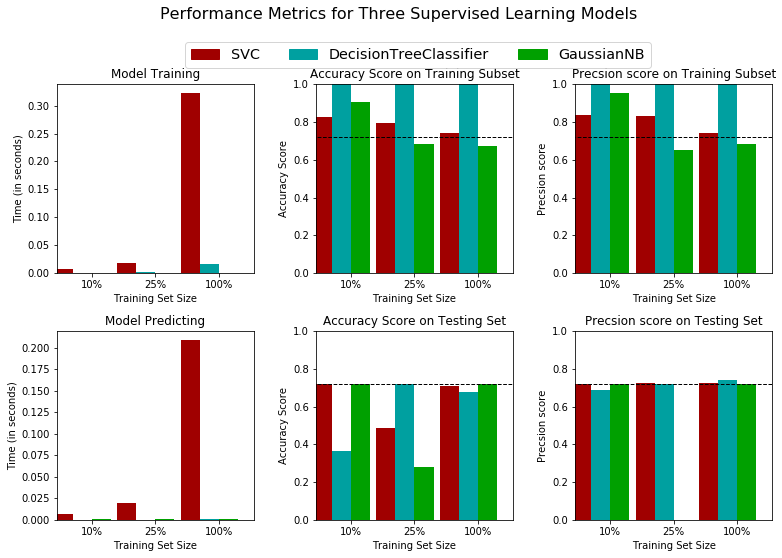

In [57]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize the three models
clf_A = SVC(random_state=44)
clf_B = DecisionTreeClassifier(random_state=44)
clf_C = GaussianNB()

# Calculate the number of samples for 10%, 25%, and 100% of the training data
samples_100 = len(y_train)
samples_25 = len(y_train)//4
samples_10 = len(y_train)//10

print(X_train.shape)
print(y_train.shape)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_10, samples_25, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

evaluate(results, benchmark_accurarcy_score, benchmark_precision_score)

### Refinement
Training set are futher sampled into either 1%, 10%, and 100% of training data respectively to see how the models perform with reduced size of training set. Interesting we found the SVM method will throw error that there is only one class in "y". Although this is allowed in Decision Tree and Naive Bayes algorithms, it is indeed not reasonable when the sample data set are either all bull and bear signals. By choosing the reduced sample sizes to 10%, 25%, and then full 100% respectively, the anormality of training set sample are avoided.





All three models perform well in testing, with when 100% of the training data are used. When training size are only 10% or 25% of total training data, all three models show weakness with a lot lower scores, especially Decision Tree and Naive Bayes. SVM's lower score show up in 25% sample size, but not as bad as the other two models.

Decision Tree appears to have some overfitting problem with it's extremely high training score. SVM and Naive Bayes have less overfitting problem and still give reasonable test score on both accurarcy and precision.

In terms of the most important benchmark of accurarcy score, and important in long only trading strategy of precision score, all three models are on par without huge deviation between them.

Given above evlaution, overall, SVM appears to be good recommendation given it's more robustness if different sample size, and stable performance of benchmar accurarcy and precision score, without suffering from big overfitting problem, it should be the recommended strategy. And we choose it to optimize.

Although we do not intend to recommend Decision Tree, it does perform well despite overfitting. And give us insight into important features. This defintely will have a lot of interests. One reason is that we used words of wisdom and choose various macro economic data and sentiments data as features, whether any of them have significant is uknown, or in other word, not machine proved. It will be intesrting just to see what important features are as seen by Decision Tree algorithm. Hence we also decide to optimize it.


In [58]:
def df_normalized(df):
    return (df-df.mean()) / (df.max() - df.min())

In [59]:
X_train_norm = df_normalized(X_train)
X_test_norm = df_normalized(X_test)

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import TimeSeriesSplit

# Initialize the classifier
clf_1 = SVC(random_state=44)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters_1 = { 'kernel': ['linear', 'poly', 'rbf'], 'C': [1.0, 0.1, 0.5, 10.0, 100.0],
               'decision_function_shape': ['ovo', 'ovr'], 'degree':[2,3,4,5]}

scorer = make_scorer(accuracy_score)

tscv = TimeSeriesSplit()
grid_obj_1 = GridSearchCV(clf_1, param_grid=parameters_1, scoring=scorer, cv=tscv)

# Fit the grid search object to the training data and find the optimal parameters using fit()
X_train_np = X_train_norm.values
y_train_np = y_train.values
X_test_np = X_test_norm.values
y_test_np = y_test.values
c, r = y_train_np.shape
y_train_np = y_train_np.reshape(c,)
grid_fit_1 = grid_obj_1.fit(X_train_np, y_train_np)

# Get the estimator
best_clf_1 = grid_fit_1.best_estimator_

# Make predictions using the unoptimized and model
predictions_1 = (clf_1.fit(X_train_np, y_train_np)).predict(X_test_np)
best_predictions_1 = best_clf_1.predict(X_test_np)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test_np, predictions_1)))
print("Precision on testing data: {:.4f}".format(precision_score(y_test_np, predictions_1)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test_np, best_predictions_1)))
print("Final precision on the testing data: {:.4f}".format(precision_score(y_test_np, best_predictions_1)))

Unoptimized model
------
Accuracy score on testing data: 0.7192
Precision on testing data: 0.7192

Optimized Model
------
Final accuracy score on the testing data: 0.6544
Final precision on the testing data: 0.6998


In [61]:
best_clf_1

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=44, shrinking=True,
  tol=0.001, verbose=False)

We can observe that the final tuned model use the paramters of:
* kernel: poly
* C: 1.0
* decision_function_shape: ovo
* degree: 2

The fine tuning using grid search appear not able to make the score any better. Both accurarcy and precision score stay at 0.7192

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import TimeSeriesSplit

# Initialize the classifier
clf_2 = DecisionTreeClassifier(random_state=44)

parameters_2 = { 'max_depth': [1,2,3,4,5,None], 'max_features': [1,2,3,4,5,6,7], 
               'min_samples_split': [2,3,4,5], 'min_samples_leaf':[1,2,3,4,5]}

scorer = make_scorer(accuracy_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj_2 = GridSearchCV(clf_2, param_grid=parameters_2, scoring=scorer, cv=TimeSeriesSplit())

# Fit the grid search object to the training data and find the optimal parameters using fit()
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values
c, r = y_train_np.shape
y_train_np = y_train_np.reshape(c,)
grid_fit_2 = grid_obj_2.fit(X_train_np, y_train_np)

# Get the estimator
best_clf_2 = grid_fit_2.best_estimator_

# Make predictions using the unoptimized and model
predictions_2 = (clf_2.fit(X_train_np, y_train_np)).predict(X_test_np)
best_predictions_2 = best_clf_2.predict(X_test_np)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test_np, predictions_2)))
print("Precision on testing data: {:.4f}".format(precision_score(y_test_np, predictions_2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test_np, best_predictions_2)))
print("Final precision on the testing data: {:.4f}".format(precision_score(y_test_np, best_predictions_2)))

Unoptimized model
------
Accuracy score on testing data: 0.6760
Precision on testing data: 0.7414

Optimized Model
------
Final accuracy score on the testing data: 0.7192
Final precision on the testing data: 0.7192


In [63]:
best_clf_2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=44, splitter='best')

## IV. Results
We narrowed down to two algorithms SVC, and Decision Tree. With SVC appears better in its ability to generate stable result even with small sample size. Decision Tree can give us some insights into important features. Both models are tunned to attempt to improve.

For SVC, we used grid search method to try on the following hyper parameters:
* kernel: linear, poly, rbf
* C: 1.0, 0.1, 0.5, 10.0, 100.0
* decision_function_shape: ovo, ovr
* degree (for poly): 2,3,4,5

Interestingly, none of these are able to improve SVM any further, with accuracy score and precision score actually both reduced slightly from 0.7192 and 0.7192, to 0.6544 and 0.6998

For Decision Tree, we also used grid search for the following hyper parameters:
* max_depth: 1,2,3,4,5,None
* max_features: 1,2,3,4,5,6,7
* min_samples_split: 2,3,4,5
* min_samples_leaf: 1,2,3,4,5
               
Were able to improve accuracy score from 0.6760 to 0.7192, while the precision score degraded a bit from  0.7414 to 0.7192.

Recall that the benchmark, the famous buy and hold stragety of passive investment has both accuracy and precision score of 0.7192, we found that we can only match, but not able to beat the benchmark.




### Model Evaluation and Validation

We perform a few validations of the model by further splitting the data and change the initial state of the model.

#### Validation by random state
To further evaluate whether, we can evaluate them with different random states, and review their resulting scores under different random states. Previously we have been using 44 for all models. We can further check if random state could affect the scores greately to check if the models have a high variance.

We do this by change the previously best fit models by retaining all the parameters except for the random state, where we use five different values.

The result on Decision Tree is as follow:

In [64]:
best_clf_2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=44, splitter='best')

In [65]:
def train_predict_score_accr_prec(model, X_train, y_train, X_test, y_test):
    # take the model and train,
    # return accurarcy, precision score of train, and accurarcy, precision score of test

    X_train_np = X_train.values
    y_train_np = y_train.values
    X_test_np = X_test.values
    y_test_np = y_test.values
    c, r = y_train_np.shape
    y_train_np = y_train_np.reshape(c,)
    model.fit(X_train_np, y_train_np)
    predictions = model.predict(X_test_np)
    
    acc_test = accuracy_score(y_test_np, predictions)
    prec_test = precision_score(y_test_np, predictions)
    
    return acc_test, prec_test

In [66]:
r_states = [44, 123, 9999, 1000, 1]
df = pd.DataFrame()

for r_state in r_states:
    model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_impurity_split=None, min_samples_leaf=1,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                presort=False, random_state=r_state, splitter='best')
    
    acc, prec = train_predict_score_accr_prec(model, X_train, y_train, X_test, y_test)
    df.loc[r_state, "Accurarcy Score"] = acc
    df.loc[r_state, "Precision Score"] = acc

df

,Accurarcy Score,Precision Score
44,0.719222,0.719222
123,0.719222,0.719222
9999,0.719222,0.719222
1000,0.719222,0.719222
1,0.719222,0.719222


The scores do not change over different random states, which validate that the model is stable.

We do the same for SVM, keeping the previously found best hyper parameters, and change random states only and re-train and test the models.

In [67]:
best_clf_1

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=44, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
r_states = [44, 123, 9999, 1000, 1]
df = pd.DataFrame()

for r_state in r_states:
    model = SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
          decision_function_shape='ovo', degree=2, gamma='auto', kernel='rbf',
          max_iter=-1, probability=False, random_state=r_state, shrinking=True,
          tol=0.001, verbose=False)    
    
    acc, prec = train_predict_score_accr_prec(model, X_train_norm, y_train, X_test_norm, y_test)
    df.loc[r_state, "Accurarcy Score"] = acc
    df.loc[r_state, "Precision Score"] = acc

df

,Accurarcy Score,Precision Score
44,0.654428,0.654428
123,0.654428,0.654428
9999,0.654428,0.654428
1000,0.654428,0.654428
1,0.654428,0.654428


The results of SVM under different random states aslo show the model is stable as the score does not vary by the difference in random state.

#### Validation by time series data set split
One technique of splitting data, as we have done earlier, is by splitting the data at certain date. And using the data before that date for training, and after that date for testing. [This article [8]](http://francescopochetti.com/pythonic-cross-validation-time-series-pandas-scikit-learn/) has further details. We can reuse this technique and shrink the training set to be smaller, so we have enough data to split between them. For our data set, previous we use data from 2006 to 2016, to test the year of 2017 and 2018. We can reduce the training set and use 2006 to 2014, to test 2015-2016, use 2006 to 2012 to test 2013-2014, and so on.

In [69]:
TS_split = [
    {"TR_S": "2006-07-05", "TR_E": "2008-12-31", "TE_S": "2009-01-02",  "TE_E": "2010-12-31"  },      
    {"TR_S": "2006-07-05", "TR_E": "2010-12-31", "TE_S": "2011-01-03",  "TE_E": "2012-12-31"  },      
    {"TR_S": "2006-07-05", "TR_E": "2012-12-31", "TE_S": "2013-01-02",  "TE_E": "2014-12-31"  },     
    {"TR_S": "2006-07-05", "TR_E": "2014-12-31", "TE_S": "2015-01-02",  "TE_E": "2016-12-30"  },    
    {"TR_S": "2006-07-05", "TR_E": "2016-12-30", "TE_S": "2017-01-03",  "TE_E": "2018-11-01"  },
]

def split_ts_data(data, TRAIN_START, TRAIN_END, TEST_START, TEST_END):
    X_train = data.loc[TRAIN_START:TRAIN_END][["PricePctP30", "TNX", "LEIMonthlyChangeSMA6", "PCRatio",
                                           "AAII", "NAAIM", "MarginDebtPct"]]
    y_train = data.loc[TRAIN_START:TRAIN_END][["BULL"]]
    X_test = data.loc[TEST_START:TEST_END][["PricePctP30", "TNX", "LEIMonthlyChangeSMA6", "PCRatio",
                                           "AAII", "NAAIM", "MarginDebtPct"]]
    y_test = data.loc[TEST_START:TEST_END][["BULL"]]
    
    return X_train, y_train, X_test, y_test

In [70]:
df = pd.DataFrame()

for TS in TS_split:
    model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_impurity_split=None, min_samples_leaf=1,
                min_samples_split=2, min_weight_fraction_leaf=0.0,
                presort=False, random_state=44, splitter='best')
    
    X_train, y_train, X_test, y_test = split_ts_data(data, TS["TR_S"], TS["TR_E"], TS["TE_S"], TS["TE_E"])
    acc, prec = train_predict_score_accr_prec(model, X_train, y_train, X_test, y_test)
    
    ts_range_title = "Train {} to {}, Test {} to {}".format(TS["TR_S"][:4], TS["TR_E"][:4], TS["TE_S"][:4], TS["TE_E"][:4])
    df.loc[ts_range_title, "Accurarcy Score"] = acc
    df.loc[ts_range_title, "Precision Score"] = acc

df

,Accurarcy Score,Precision Score
"Train 2006 to 2008, Test 2009 to 2010",0.660714,0.660714
"Train 2006 to 2010, Test 2011 to 2012",0.657371,0.657371
"Train 2006 to 2012, Test 2013 to 2014",0.769841,0.769841
"Train 2006 to 2014, Test 2015 to 2016",0.646825,0.646825
"Train 2006 to 2016, Test 2017 to 2018",0.719222,0.719222


The scores using these data split on the Decision Tree model show the models are relatively stable, but have lower scores during the bear market or stock correction years of 2015-2016, where Fed reserve stopping quantitive easing and China economic slowdown caused some overall worse performance of stock market. 2011 has Europe dual recessions also is one of the significant during the whole time period of training and testing.

In [71]:
df = pd.DataFrame()

for TS in TS_split:
    model = SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
          decision_function_shape='ovo', degree=2, gamma='auto', kernel='rbf',
          max_iter=-1, probability=False, random_state=44, shrinking=True,
          tol=0.001, verbose=False)    
    
    X_train, y_train, X_test, y_test = split_ts_data(data, TS["TR_S"], TS["TR_E"], TS["TE_S"], TS["TE_E"])
    X_train_norm = df_normalized(X_train)
    X_test_norm = df_normalized(X_test)
    
    acc, prec = train_predict_score_accr_prec(model, X_train_norm, y_train, X_test_norm, y_test)
    
    ts_range_title = "Train {} to {}, Test {} to {}".format(TS["TR_S"][:4], TS["TR_E"][:4], TS["TE_S"][:4], TS["TE_E"][:4])
    df.loc[ts_range_title, "Accurarcy Score"] = acc
    df.loc[ts_range_title, "Precision Score"] = acc

df

,Accurarcy Score,Precision Score
"Train 2006 to 2008, Test 2009 to 2010",0.488095,0.488095
"Train 2006 to 2010, Test 2011 to 2012",0.647410,0.647410
"Train 2006 to 2012, Test 2013 to 2014",0.636905,0.636905
"Train 2006 to 2014, Test 2015 to 2016",0.557540,0.557540
"Train 2006 to 2016, Test 2017 to 2018",0.654428,0.654428


The scores using these data split on the SVM model show the models are relatively stable, but have lower scores during the bear market or stock correction years of 2015-2016, and 2011. The lower score is more significant than Decision Tree.

### Justification
Both Decision Tree and SVM perform well and stable under different random state. When using different sample size by selecting different period of back test period, the higher scores are achieved by Decision Tree compared to SVM in all cases. This suggest Decision Tree is better algorithm in this particular problem. The Time splitting technique does reveal the well known issue in this domain, or maybe for all time series data. That is, when using certain amount of history as training data, which period of history you look at make a difference. Sometime a huge different. Also, the market is known to have known cycles[4], which could have frequency of a few years. That translates to stock market having cycles between bull and bear market, which bull market average 9.1 years and bear market average 1.4 years[9]. When the test period coverage the bear market, the past stragey tends not to work. And it does reveal in lower scores during bear years. However, all scores still achieve higher than random score (0.5) and provide reasonable guideline for investors.

## V. Conclusion


### Free-Form Visualization
Previous we use Decision Tree as one of the model to investigate and improve, it also provides us with the features that are considered important.

In [72]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

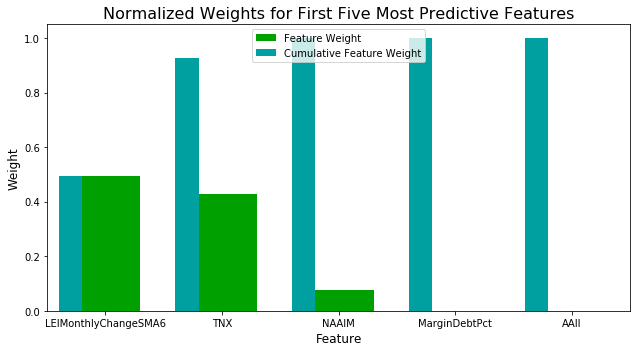

In [73]:
model_feature_insight = best_clf_2.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model_feature_insight.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

In [74]:
importances

array([ 0.        ,  0.42969339,  0.49584192,  0.        ,  0.        ,
        0.07446468,  0.        ])

### Reflection

#### On the result
Our study found that we can match, but not able to beat the benchmark strategy of buy and hold, passive investment. Although it is somehow disppointing, it is actually quite remarkable findings as it shows the difficulty of reliably beating the market might actually be a mirage and the strategy that actually beats the market, but be a form of overfitting that is bound to cause problem in the real world application. In a way, it proves that the study and philosophy of the random walk strategy[5], the type of strategy the usually comes from academic rather than industry participant, does have some merit.

The important features analysis, reveal that only three features are considered important out of the total of seven we tested. The in order of most significant, are:
* Six month moving averge of the change of Leading Economic Index from previous month. (49%)
* 10 Year Treasure Interest Rate (42%)
* Investiment Sentiment Survey of National Association of Active Investment Managers (7%)

The finding does make very intuitive sense in that the old saying that market is not the economic, but are indeed resememble the economic. Also, bond market has always been the most direct competition of stock market for investor's money, and given 10 Year Treasury is usually considered 'risk free' return, and being the floor of how financial assets are priced, it's interest rate definitely plan a big role in determing the market value.

Sentiment is a form of investor psychology and does move the market in some way. Although not a big factor.


#### On the process
The data collecting process is challenging as they are coming from various of organizations and have their own different format, different frequency. There are some for profit providers of financial data to provide services in this area. The fact that these for fee service exist explain the challenging of collecting the data.

One we have the data ready, the one important constraint of time series data is to avoid look ahead bias, that is, you cannot use future data to train and predict past data, as this violates real world logic. As a result, tecnhiques of splitting trainging and testing data cannot be abritarily applied. We are forced to split the training and testing data with strict separation of a certain cut off date.

In this reseach, we use a novel approach of using a snapshot features in a particular day to predict future days. This gives us a large amount of data to train while still able to avoid look ahead bias described in previous paragraph. However, this approach also limits us in use features for one day only, instead of a certain period of past history, for example, past 30 days.


### Improvement
* Seven features were collected and tested. Although they might be representative enough, there are way more available and could be more significant data that can be gathered and studied.
* Instead of looking at one day snapshot, we could use a period of time and then use aggregate function like mean as features input. There could be decision on where to use rolling window for this period that will provide larger sample size, or use non-overlapping window which could reduce sample size the larger the period is. The period appoarch makes some logical sense as the dynamics in the history could make a different. Although one could argue snapshot is best as the features for that day have been 'priced-in'.
* We also attempted to generate only a boolean signal of bull or bear. We could expand that signal into range of return, for example, frp, top quartile of positive to bottom quartile of negative return. This provides more classes and could also add investor in having a expected return value to help them decide on investment strategy.

-----------



## VI. References
- [1] Fama, E. F.; French, K. R. (1993). "Common risk factors in the returns on stocks and bonds". Journal of Financial Economics.
- [2] Fama, E. F.; French, K. R. (1992). "The Cross-Section of Expected Stock Returns". The Journal of Finance.
- [3] Shiller, Robert (2005). Irrational Exuberance (2d ed.). Princeton University Press. ISBN 0-691-12335-7.
- [4] Dalio, Ray. A Template For Understanding Big Debt Crises. (2018)
- [5] Malkiel, Burton Gordon (1973). A Random Walk Down Wall Street: The Time-tested Strategy for Successful Investing. New York: W.W. Norton. ISBN 0-393-05500-0
- [6] André Kostolany (1996). Weisheit eines Spekulanten - German
- [7] Renuka Joshi (2016). [Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)
- [8] Francesco (2014). [Pythonic Cross Validation on Time Series](http://francescopochetti.com/pythonic-cross-validation-time-series-pandas-scikit-learn/)
- [9] First Trust (2018). History of U.S. Bear & Bull Markets Since 1926 (https://www.ftportfolios.com/Common/ContentFileLoader.aspx?ContentGUID=4ecfa978-d0bb-4924-92c8-628ff9bfe12d)